<a href="https://colab.research.google.com/github/vaibhatt/Fall_Fest_iNets/blob/main/coronadetection_xray_accuracy_95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset at:**

https://www.kaggle.com/gunhcolab/fan-fest-20-covid-healthcare-and-economy

In [1]:
!unzip /content/drive/MyDrive/custom_covid_normal_testset.zip

Archive:  /content/drive/MyDrive/custom_covid_normal_testset.zip
   creating: custom_covid_normal_testset/
   creating: custom_covid_normal_testset/Covid/
  inflating: custom_covid_normal_testset/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: custom_covid_normal_testset/Covid/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg  
  inflating: custom_covid_normal_testset/Covid/0a7faa2a.jpg  
  inflating: custom_covid_normal_testset/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: custom_covid_normal_testset/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: custom_covid_normal_testset/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: custom_covid_normal_testset/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: custom_covid_normal_testset/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: custom_covid_normal_testset/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: custom_covid_normal_testset/Covid/1-s2

Loading the libraries and the datset

In [33]:
import numpy as np 
import pandas as pd

#We are using keras as our base package to build our binary classifier. 
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
from keras.callbacks import  EarlyStopping

import os
import gc
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

Collecting location of path of the image files in google drive.

In [34]:
trainPATH = '/content/drive/MyDrive/Colab_Notebook/CovidDataset/Train'
valPATH = '/content/drive/MyDrive/Colab_Notebook/CovidDataset/Val'
testPATH = '/content/custom_covid_normal_testset'

In [35]:
filecovid = ['Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', 'Covid/0a7faa2a.jpg', 'Covid/16660_1_1.jpg']
filenon = ['Normal/NORMAL2-IM-1160-0001.jpeg', 'Normal/NORMAL2-IM-1197-0001.jpeg', 'Normal/NORMAL2-IM-1301-0001.jpeg']


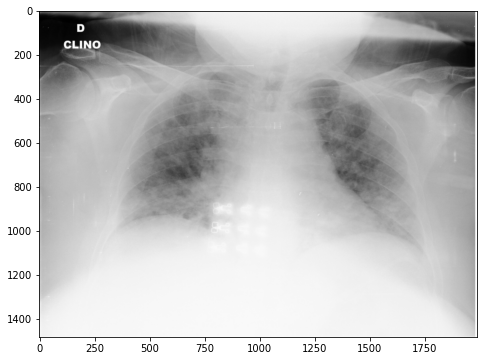

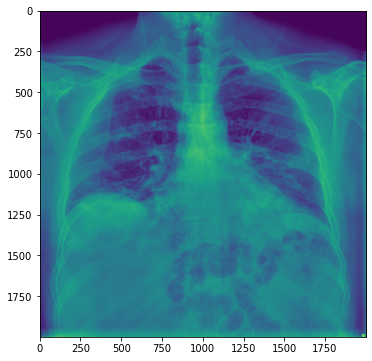

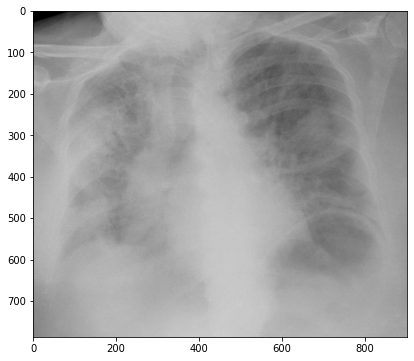

In [36]:
for img in filecovid:
    image = mpimg.imread(os.path.join(testPATH, img))
    plt.figure(figsize=(8, 6))
    imgplot = plt.imshow(image)
    plt.show()

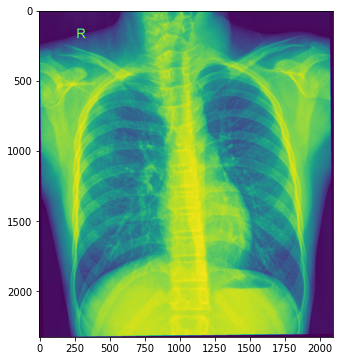

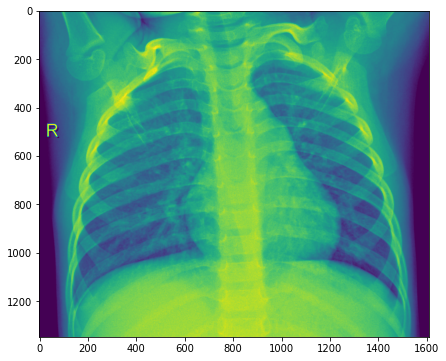

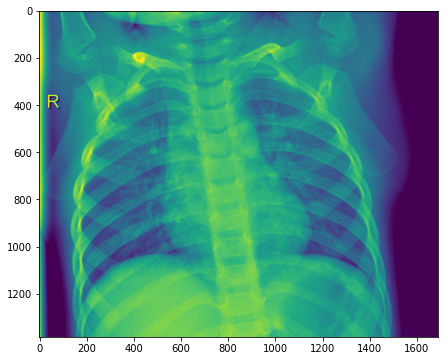

In [37]:
for img in filenon:
    image = mpimg.imread(os.path.join(testPATH, img))
    plt.figure(figsize=(8, 6))
    imgplot = plt.imshow(image)
    plt.show()

Preprocessing the images and generating raw image data using ImageDataGenerator
1. Train
2. Valid
3. Test

In [38]:
def img_gen(train_path_variable, val_path_variable, test_path_variable):
  train_preprocess = keras.preprocessing.image.ImageDataGenerator(
                                        rescale = 1./255,
                                        zoom_range = 0.2,
                                        shear_range = 0.2,
                                        horizontal_flip = True
                                    )

  train = train_preprocess.flow_from_directory(
                                        train_path_variable,
                                        target_size = (224, 224),
                                        batch_size = 16,
                                        class_mode = 'binary'
                                    )
  validation_preprocess = keras.preprocessing.image.ImageDataGenerator(
                                        rescale=1./255
                                    )

  val = validation_preprocess.flow_from_directory(
                                        val_path_variable,
                                        target_size = (224, 224),
                                        batch_size = 16,
                                        class_mode = 'binary'
  )

  test_preprocess = keras.preprocessing.image.ImageDataGenerator(
                                        rescale=1./255
                                    )

  test = test_preprocess.flow_from_directory(
                                        test_path_variable,
                                        target_size = (224, 224),
                                        batch_size = 16,
                                        class_mode = 'binary'
                                          )
  return train, val, test

In [39]:
train, val, test = img_gen(trainPATH, valPATH, testPATH)

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 977 images belonging to 2 classes.


Lungs which are not affected by Covid-19 are categorized as 1 and lungs affected are categorized as 0 in both training and validation data.

In [40]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [41]:
val.class_indices

{'Covid': 0, 'Normal': 1}

In [42]:
test.class_indices

{'Covid': 0, 'Normal': 1}

**This is the simplest effective model out there**

## Model building using CNNs
After much model tuning, we have reached this set of layers in our convolutional layer. We are using binary cross entropy as our loss function as we are building a binary classifier with ADAM optimizer.

In [43]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience = 3)

Plotting the sturucture of our X-Ray classifier model

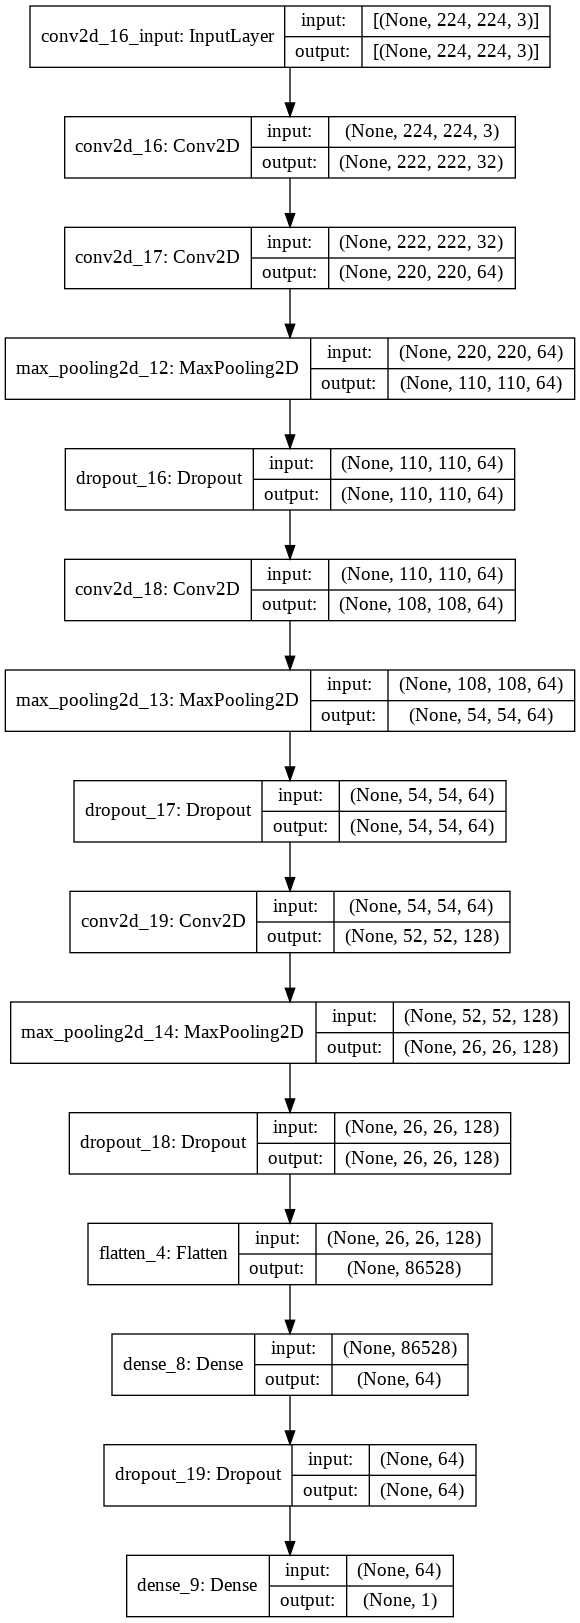

In [44]:
plot_model(
            model, 
            to_file = 'modelplot.png', 
            show_shapes = True, 
            show_layer_names = True, 
            rankdir = "TB", 
            expand_nested = True,
            dpi = 96
          )

## Training the model

In [45]:
history = model.fit_generator(
                                train,
                                epochs = 20,
                                validation_data = val, 
                                callbacks = [early_stop]
                            )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
14/14 [==============================] - 11s 775ms/step - loss: 2.3765 - accuracy: 0.4989 - val_loss: 0.6795 - val_accuracy: 0.5333
Epoch 2/20
14/14 [==============================] - 10s 733ms/step - loss: 0.6617 - accuracy: 0.6537 - val_loss: 0.4794 - val_accuracy: 0.9333
Epoch 3/20
14/14 [==============================] - 10s 739ms/step - loss: 0.3296 - accuracy: 0.8474 - val_loss: 0.1099 - val_accuracy: 0.9667
Epoch 4/20
14/14 [==============================] - 10s 736ms/step - loss: 0.3002 - accuracy: 0.8876 - val_loss: 0.1757 - val_accuracy: 0.9500
Epoch 5/20
14/14 [==============================] - 10s 732ms/step - loss: 0.2520 - accuracy: 0.9178 - val_loss: 0.1635 - val_accuracy: 0.9667
Epoch 6/20
14/14 [==============================] - 10s 727ms/step - loss: 0.1847 - accuracy: 0.9414 - val_loss: 0.0823 - val_accuracy: 0.9667
Epoch 7/20
14/14 [==============================] - 10s 733ms/step - loss: 0.2081 - accuracy: 0.9179 - val_loss: 0.0984 - val_accuracy: 0.9833

Evaluating on our custom 1000 x-ray images (balance)

In [46]:
model.evaluate(test)

62/62 [==============================] - 21s 343ms/step - loss: 0.2201 - accuracy: 0.9488


[0.220105841755867, 0.9488229155540466]

In [47]:
gc.collect()

29204

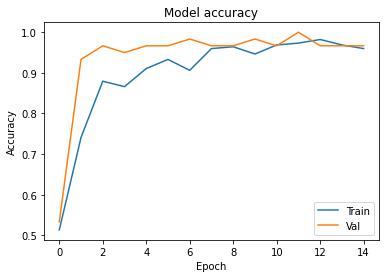

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()